In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random 
from tqdm.notebook import tqdm
from skimage.io import imread

%matplotlib inline

# Зафиксируем случайность, чтобы у нас получались одинаковые результаты.
np.random.seed(seed=42)

Бросим на плоскость случайно точки с разными параметрами случайности, чтобы образовались кластеры.

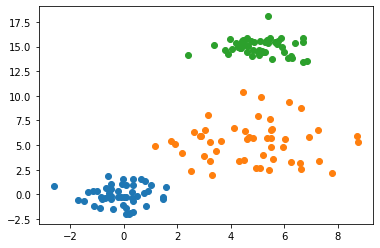

In [2]:
p1 = np.random.normal(loc=0, scale=1, size=(50,2))
p2 = np.random.normal(loc=5, scale=2, size=(50,2))
p3 = np.random.normal(loc=10, scale=0.8, size=(50,2)) - np.array([5, -5])

X = np.concatenate((p1, p2, p3))

plt.scatter(p1[:,0], p1[:, 1])
plt.scatter(p2[:,0], p2[:, 1])
plt.scatter(p3[:,0], p3[:, 1])

Нарисуем точки на плоскости, но без окрашивания точек. Так будет видеть данные алгоритм. Можем ли мы сами понять где и какие кластеры?

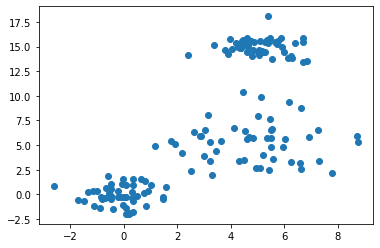

In [13]:
plt.scatter(X[:, 0], X[:, 1])


Напишите функцию, которая рассчитывает расстояния от центров кластеров до каждой точки и возвращает, к какому кластеру принадлежит каждая точкa

In [3]:
def kmeans_predict(x, clusters):
    
    ls = np.array([[] for i in range(X.shape[0])])
    for i in range(centroids.shape[0]):
        k = np.sqrt(np.sum(np.power(X-centroids[i,:],2),1)).reshape(-1,1)
        ls = np.hstack([ls,k])
    

    #HINT
    # Считаем расстояния от наблюдений до центроид
    # Смотрим, до какой центроиды каждой точке ближе всего (np.argmin)

    return np.argmin(ls,axis=1)

# В scipy есть замечательная функция, которая считает расстояния
# между парами точек из двух массивов, подающихся ей на вход
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html#scipy.spatial.distance.cdist
# Это сократит кол-во for и из-за этого код будет работать намного быстрее
# Но так нагляднее

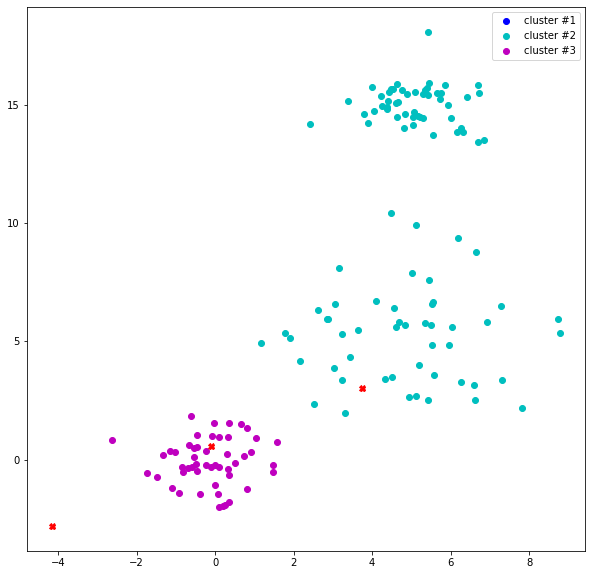

In [4]:
centroids = np.random.normal(loc=0.0, scale=5., size=6)
centroids = centroids.reshape((3, 2)) # итого получаем 3 точки в двумерном пространстве
plt.figure(figsize=(10, 10))
labels = kmeans_predict(X, centroids)

plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
plt.plot(centroids[:, 0], centroids[:, 1], 'rX')
plt.legend(loc=0)

Напишите код для обновления центров кластеров. Запоминайте центры кластеров  это понадобится потом для визуализации. Для упрощения каждому облачку данных заранее присвоим кластер.
Положим в каждую новую центроиду геометрический центр её точек.

In [41]:
centroids = np.random.normal(loc=0.0, scale=1., size=6).reshape((3, 2))

cent_history = [] # История центров кластеров
cent_history.append(centroids)

STEPS = 5 # количество шагов итерации обновления центров кластеров

for i in range(STEPS):

    labels = kmeans_predict(X, centroids)
    centroid = []
    for i in range(centroids.shape[0]):
        centroid.append(np.sum(X[labels == i],0)/np.sum(labels==i))
    centroids = np.array(centroid)
    # HINT 
    # Положим в каждую новую центроиду геометрический центр её точек

    cent_history.append(centroids)

In [87]:
cent_history

[array([[-0.01901621, -1.00252936],
        [-0.01851314, -0.28865864],
        [ 0.32271856, -0.82723094]]),
 array([[-0.29447533, -1.4897888 ],
        [ 3.44334177,  7.77598789],
        [ 4.4139124 ,  1.44586271]]),
 array([[-0.17067335, -0.08914908],
        [ 4.91184603, 11.92415199],
        [ 4.96163449,  3.30906648]]),
 array([[-0.13567563, -0.0720174 ],
        [ 5.10275012, 14.36753727],
        [ 4.76951308,  4.76040792]]),
 array([[-0.13567563, -0.0720174 ],
        [ 5.09132725, 14.81539717],
        [ 4.80965761,  5.07582047]]),
 array([[-0.13567563, -0.0720174 ],
        [ 5.09075601, 14.91125821],
        [ 4.81600053,  5.17481361]])]

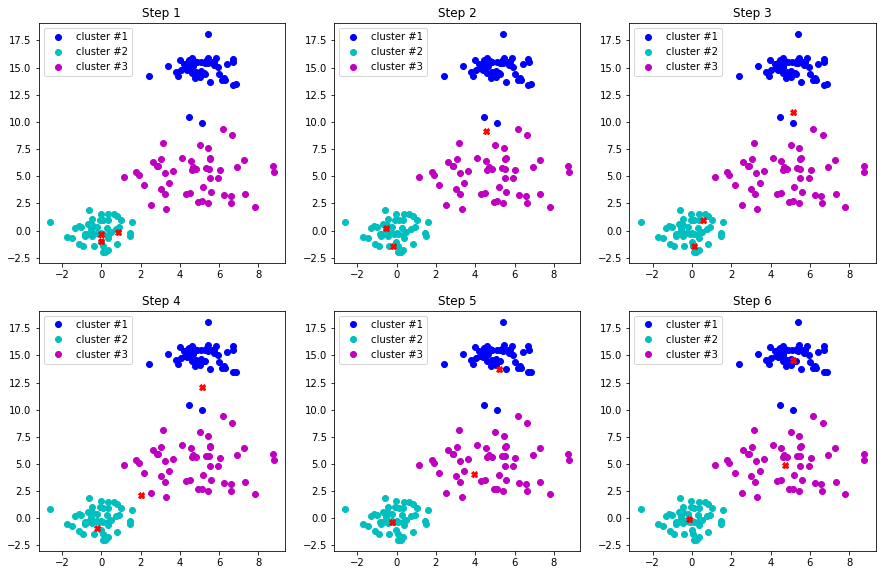

In [42]:
plt.figure(figsize=(15, 15))
for i in range(STEPS + 1):
    labels = kmeans_predict(X, cent_history[i])

    plt.subplot((STEPS + 1) // 2, (STEPS + 1) // 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1))

Напишите функцию обучения kMeans, которая возвращает центры кластеров и к какому кластеру принадлежит каждая точка.
k - кол-во кластеров
max_iter - через сколько итераций остановится
tol - если сумма расстояний между прошлыми центрами кластеров и новыми центрами меньше tol, то остановиться
low и high - это минимально и максимально значение которое могут принимать точки центров кластеров при генерации

In [103]:
def kmeans_fit_predict(x, k=8, max_iter=100, tol=0.1, low=0.0, high=1.0):
    
    centroids = []
    for _ in range(k):
        centroids.append(np.random.uniform(low,high,x.shape[1]))
    centroids = np.array(centroids)
    
    cent_history = []
    cent_history.append(centroids)
    for i in range(max_iter):
        
        ls = np.array([[] for i in range(x.shape[0])])
        for t in range(centroids.shape[0]):
            cent = np.sqrt(np.sum(np.power(x - centroids[t,:],2),1)).reshape(-1,1)
            ls = np.hstack([ls,cent])
        labels = np.argmin(ls,1)
        
        centroid = []
        for j in range(centroids.shape[0]):
            if np.sum(labels==j) == 0:
                centroid.append(np.random.uniform(low,high,x.shape[1]))
            else:
                centroid.append(np.mean(x[labels == j],0)
        centroids_n = np.array(centroid)
        loss = np.abs(np.sum(centroids_n-centroids))
        
        print(i)
        print(loss)
        
        if loss < tol:
            break
        else:
            centroids = centroids_n
            cent_history.append(centroids)
    # сгенерируйте центры кластеров, используя np.random.uniform
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
    
    # в каждой итерации нужно сделать следующее:
    #  * определить, к какому кластеру относится каждая точка (для этого генерировали центры кластеров)
    #  * по точкам в кластере пересчитываем центр кластера (np.average), если нет точек в кластере - генерируем новый случайный центр 
    #  * считаем loss - сейчас это показатель того, насколько сильно изменилось значение центров кластеров с прошлой итерации
    #  * обычно loss - это показатель того, насколько плохо предсказывает модель, чем он меньше, тем лучше
    #  * loss = |СУММА(полученные_кластеры_на_текущей_итерации - кластеры_на_прошлой_итерации)| 


    # для удобства можно выводить номер итерации и ее loss

    return centroids, labels

In [65]:
# установим число кластеров k равное трем
# не генерируем центр кластера выше максимального значения из Х - ограничим это используя high
clusters_mnist, labels_mnist = kmeans_fit_predict(X, k=3, low=0.0, high=np.max(X))

0
614.5839536127698
1
15.676089139152214
2
1.5097234497874097
3
1.512024255027871
4
0.5590744124774476
5
0.49263618698480116
6
0.0322629540235988
7
0.06117262065175638
8
0.06019211858263995
9
0.04795045918251101
10
0.11130622660563003
11
0.009765571512501556


In [45]:
print(clusters_mnist)
labels_mnist

[[-0.08348398 -0.02434869]
 [ 5.09075601 14.91125821]
 [ 4.86370682  5.23347459]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

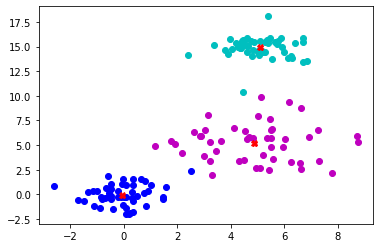

In [46]:
plt.plot(X[labels_mnist == 0, 0], X[labels_mnist == 0, 1], 'bo', label='cluster #1')
plt.plot(X[labels_mnist == 1, 0], X[labels_mnist == 1, 1], 'co', label='cluster #2')
plt.plot(X[labels_mnist == 2, 0], X[labels_mnist == 2, 1], 'mo', label='cluster #3')
plt.plot(clusters_mnist[:,0],clusters_mnist[:,1], 'rX')

Рассмотрим датасет рукописных цифр MNIST, с которым мы уже работали в задании по KNN.

In [54]:
from sklearn import datasets

X, y = datasets.load_digits(return_X_y=True)

print("Экземпляров: {}\nРазмер изображения: {}x{}".format(X.shape[0], np.sqrt(X.shape[1]), np.sqrt(X.shape[1])))

Экземпляров: 1797
Размер изображения: 8.0x8.0


Натренируйте kMeans используя функцию kmeans_fit_predict(), выберите high и low (как в примере с точками). Выберите подходящее число кластеров

In [71]:
cluster_mnist, labels_mnist = kmeans_fit_predict(X,low=np.min(X),high=np.max(X),k=np.unique(y).shape[0])

0
1297.1781257708749
1
131.07011689441907
2
35.20275259596248
3
65.08287658613366
4
76.49486583254404
5
86.026238514866
6
10.782341030872882
7
15.555299685625693
8
1.8139402811682284
9
18.710080191807325
10
96.37049402947643
11
60.18025147232705
12
87.66076970146672
13
134.47615023491065
14
26.61417374362391
15
69.11601552828027
16
19.248458700687802
17
113.17172080845947
18
46.296544869554566
19
0.2313787662131237
20
34.910456494244116
21
28.272104624874522
22
96.05751194579035
23
37.91611376955243
24
30.00074438191018
25
15.856413253595058
26
4.85140149029294
27
33.97256996674596
28
42.428984691319954
29
68.39505426748781
30
97.52371267410749
31
14.947854892558167
32
74.15634539773465
33
24.56018490464067
34
27.484414727764413
35
76.08116731697267
36
98.25507645339921
37
26.724250404206458
38
31.046250211685493
39
53.54576359744113
40
49.252949007402364
41
45.74030344858582
42
51.68466819779304
43
48.801467771111845
44
78.65847482668117
45
3.5469884856059934
46
1.8678736872509063
47


Проверим. Выведем 10 точек из какого нибудь кластера и посмотрим, что они соотвествуют одной цифре.

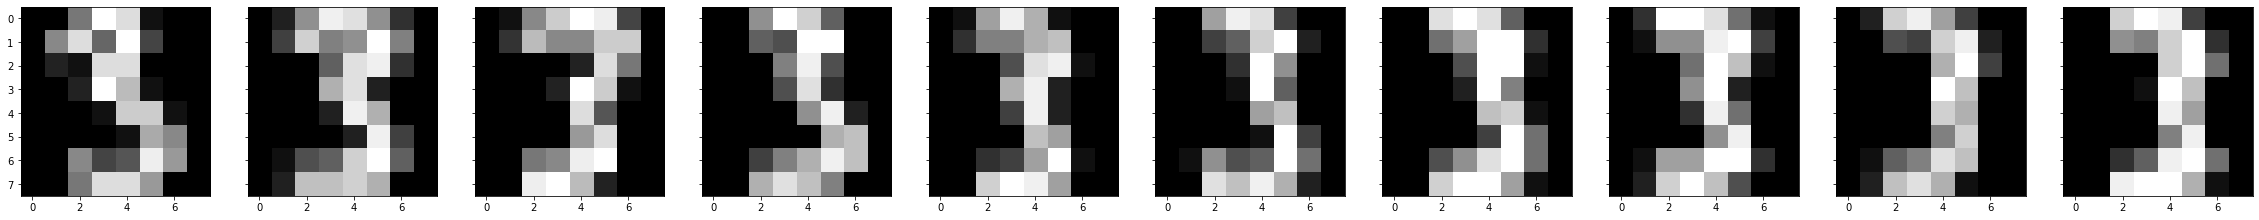

In [81]:
number = 3 # Номер кластера
count = 10 # Кол-во примеров
testX = X[y == number]

testX[0,:].reshape([8,8])
f, axes = plt.subplots(1, count, sharey=True, figsize=(40,6))
for i in range(count):
    axes[i].imshow(testX[i,:].reshape([8,8]), cmap='gray')

Можно найти центры кластеров по фотографиям людей.

Возьмем фото 12 разных людей и разобьем их на кластеры. Так можно решать, например, задачу идентификации людей. Можно добавлять новое лицо и, не переобучая kmeans, определять, кто на этой фотографии (к какому кластеру относится картинка).

In [82]:
# загрузим датасет с фотографиями знаменитостей
from sklearn import datasets
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, resize=0.4)

Ariel Sharon: 77 photos.
Colin Powell: 236 photos.
Donald Rumsfeld: 121 photos.
George W Bush: 530 photos.
Gerhard Schroeder: 109 photos.
Hugo Chavez: 71 photos.
Jacques Chirac: 52 photos.
Jean Chretien: 55 photos.
John Ashcroft: 53 photos.
Junichiro Koizumi: 60 photos.
Serena Williams: 52 photos.
Tony Blair: 144 photos.


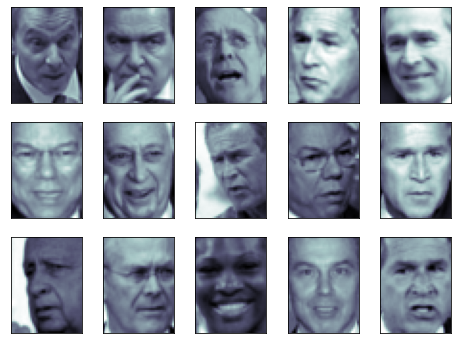

In [92]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='bone')
    
for i, name in enumerate(lfw_people.target_names):
    print("{}: {} photos.".format(name, (lfw_people.target == i).sum()))

Натренируйте kMeans и нарисуйте центры кластеров как картинки выше.

In [101]:
X = lfw_people.data
y = lfw_people.target

In [104]:
cluster_phot,label_phot = kmeans_fit_predict(X,tol=10,low=np.min(X),high=np.max(X),k=np.unique(y).shape[0])

0
39259.95733905221
1
5138.701
2
6882.133
3
6484.0254
4
2489.2393
5
2159.7454
6
5978.599
7
5120.4927
8
3374.7004
9
2908.9473
10
2840.7278
11
898.1161
12
1465.4038
13
830.40967
14
970.9849
15
1297.1791
16
1054.7993
17
1160.4463
18
720.56525
19
588.4575
20
74.38315
21
103.57391
22
388.609
23
900.26117
24
1200.9104
25
463.5483
26
722.61005
27
46.586067
28
197.53375
29
214.14566
30
0.0


Просто так визуализировать 64-мерный объект не получится, нам нужно уменьшить его размерность до 2, чтобы он укладывался на плоскость.

Существует специальный алгоритм PCA - Метод главных компонент.

Нарисуем scatter plot для тренировочной выборки: на графике у нас будут точки, помеченные лейблом - цифрой которую обозначает эта точка в пространстве.

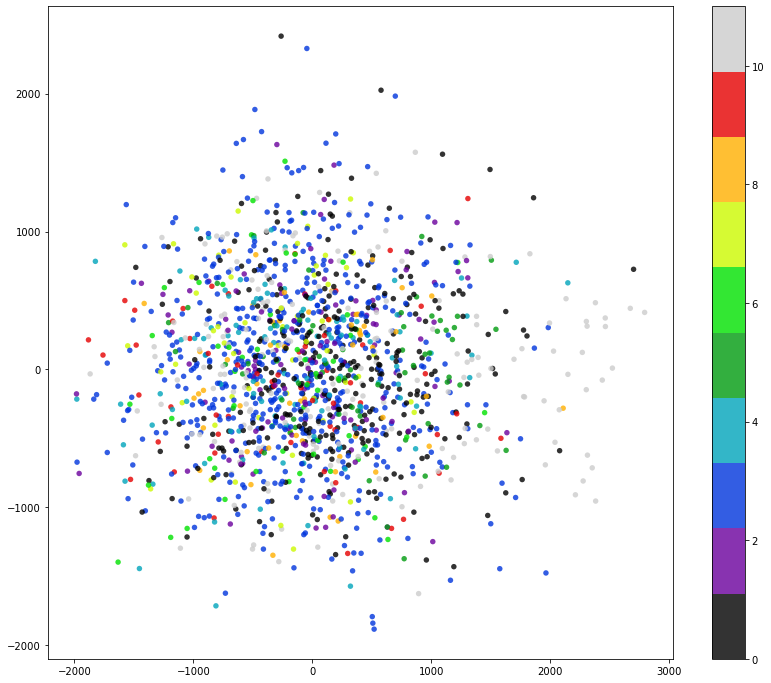

In [112]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2,random_state=42) # 2 компоненты, значит 2-мерное представление

X_tr = pca.fit_transform(X)
plt.figure(figsize=(14,12))
plt.scatter(X_tr[:,0],X_tr[:,1],c=y,cmap=plt.cm.get_cmap('nipy_spectral', 10),edgecolor='none', alpha=0.8, s=30)
plt.colorbar()

А теперь посмотрим как расставил границы наш алгоритм KMeans. Как видим - хоть цвета и перепутаны, но сами кластеры угадываются.

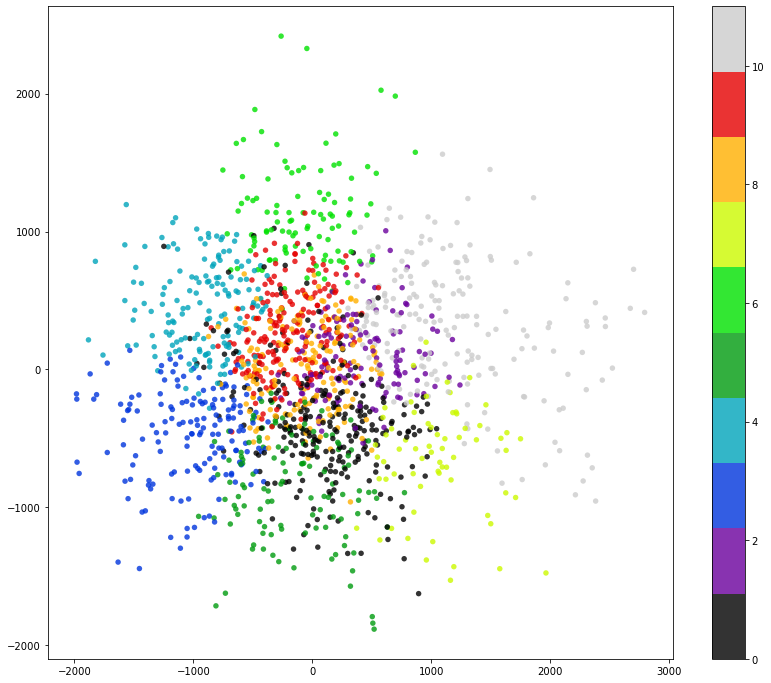

In [115]:
plt.figure(figsize=(14,12))
plt.scatter(X_tr[:,0], X_tr[:,1], c=label_phot, cmap=plt.cm.get_cmap('nipy_spectral', 10),
            edgecolor='none', alpha=0.8, s=30,)
plt.colorbar()

Центры кластеров представляют из себя нечто среднее, окруженное максимально "похожими" на них элементами. Поэтому мы можем предположить, что на визуализации, центры кластеров будут похожи на цифры.

Центры кластеров можно получить у модели лежат в cluster_phot.

ValueError: cannot reshape array of size 1850 into shape (8,8)

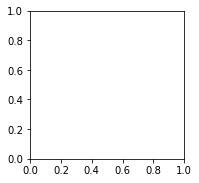

In [118]:
plt.figure(figsize=(16, 6))

for i, center in enumerate(cluster_phot):
    plt.subplot(2, 5, i + 1)
    plt.imshow(center[:].reshape([8,8]), cmap='gray')